# <p style="font-family: 'Amiri'; font-size: 3rem; color: #000000; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #9088fc; padding: 20px; border-radius: 20px; border: 7px solid #000000; width:95%"> 🍄 Mushroom Magic 🍄 </p>

### The goal of this competition is to predict whether a mushroom is edible or poisonous based on its physical characteristics.

### <mark> == WORK IN PROGRESS== </mark>

This Notebook covers, Basic EDA, Visualization, Feature Engineerng and Transform.

In [1]:
# Importing Libs

import pandas as pd
import numpy as np
import warnings
from prettytable import PrettyTable

import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

warnings.filterwarnings("ignore")

In [2]:
# Loading the Dataset

train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')
subs = pd.read_csv('../data/sample_submission.csv')

In [3]:
# Data Dimensions

print(' >> Train Data Dimensions : ' , train.shape)
print(' >> Test Data Dimensions  : ' , test.shape)

 >> Train Data Dimensions :  (3116945, 22)
 >> Test Data Dimensions  :  (2077964, 21)


# <p style="font-family: 'Amiri'; font-size: 3rem; color: #000000; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #9088fc; padding: 20px; border-radius: 20px; border: 7px solid #000000; width:95%"> 🍄 Exploratory Data Analysis 🍄 </p>

## ❆ Initial Thoughts - 
- Missing Values seems consistent across training and testing set.
- Stem Root, Stem surfaem Veil Type, Veil color and spore print color seems to have too many Null Values. 
- Some other features also have a few misisng values as well
- It's safe to drop id columns

## ❆ Categorical Features Analysis

- There are a lot of rare categories, Majority of data is encompassed by selected few categories. 
- Is it due to incorrect formatting of data or just a way to introduce Noise in this synthetic dataset??
- Would be worth dealing with rare categories - probably combine categories with very few values into a single "Other" category.

## ❆ Numerical Features Analysis
- 3 Numerical Features seems to be skewed.
- Violin Charts shows some distinctive patterns across the target variable.
- Will Need to deal with outliers.

In [4]:
def dataset_summary(df):
    summary = pd.DataFrame({
        'Data Type': df.dtypes,
        'Null Values': df.isnull().sum(),
        'Null Values (%)': df.isnull().mean() * 100,
        'Unique Values': df.nunique()
    })
    
    return summary

def print_summary(df):
    summary = dataset_summary(df)
    table = PrettyTable()
    table.field_names = ["Column", "Data Type", "Null Values", "Null Values (%)", "Unique Values"]
    
    for column in summary.index:
        table.add_row([column, summary.loc[column, 'Data Type'], 
                       summary.loc[column, 'Null Values'], 
                       round(summary.loc[column, 'Null Values (%)'], 2), 
                       summary.loc[column, 'Unique Values']])
    
    print(table)

In [5]:
# Training Dataset Summary
print_summary(train)

+----------------------+-----------+-------------+-----------------+---------------+
|        Column        | Data Type | Null Values | Null Values (%) | Unique Values |
+----------------------+-----------+-------------+-----------------+---------------+
|          id          |   int64   |      0      |       0.0       |    3116945    |
|        class         |   object  |      0      |       0.0       |       2       |
|     cap-diameter     |  float64  |      4      |       0.0       |      3913     |
|      cap-shape       |   object  |      40     |       0.0       |       74      |
|     cap-surface      |   object  |    671023   |      21.53      |       83      |
|      cap-color       |   object  |      12     |       0.0       |       78      |
| does-bruise-or-bleed |   object  |      8      |       0.0       |       26      |
|   gill-attachment    |   object  |    523936   |      16.81      |       78      |
|     gill-spacing     |   object  |   1258435   |      40.37    

In [6]:
# Test Dataset Summary
print_summary(test)

+----------------------+-----------+-------------+-----------------+---------------+
|        Column        | Data Type | Null Values | Null Values (%) | Unique Values |
+----------------------+-----------+-------------+-----------------+---------------+
|          id          |   int64   |      0      |       0.0       |    2077964    |
|     cap-diameter     |  float64  |      7      |       0.0       |      3745     |
|      cap-shape       |   object  |      31     |       0.0       |       62      |
|     cap-surface      |   object  |    446904   |      21.51      |       59      |
|      cap-color       |   object  |      13     |       0.0       |       57      |
| does-bruise-or-bleed |   object  |      10     |       0.0       |       22      |
|   gill-attachment    |   object  |    349821   |      16.83      |       66      |
|     gill-spacing     |   object  |    839595   |       40.4      |       35      |
|      gill-color      |   object  |      49     |       0.0     

In [7]:
num_cols = ['cap-diameter', 'stem-height', 'stem-width']
cat_cols = ['cap-shape', 'cap-surface', 'cap-color',
   'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
   'stem-root', 'stem-surface', 'stem-color', 'veil-type', 'veil-color', 'has-ring',
   'ring-type', 'spore-print-color', 'habitat', 'season']

train["class"] = train["class"].replace({"p":1, "e":0})

train[cat_cols] = train[cat_cols].fillna("_NA_")
test[cat_cols] = test[cat_cols].fillna("_NA_")

train[num_cols] = train[num_cols].fillna(train[num_cols].median())
test[num_cols] = test[num_cols].fillna(test[num_cols].median())

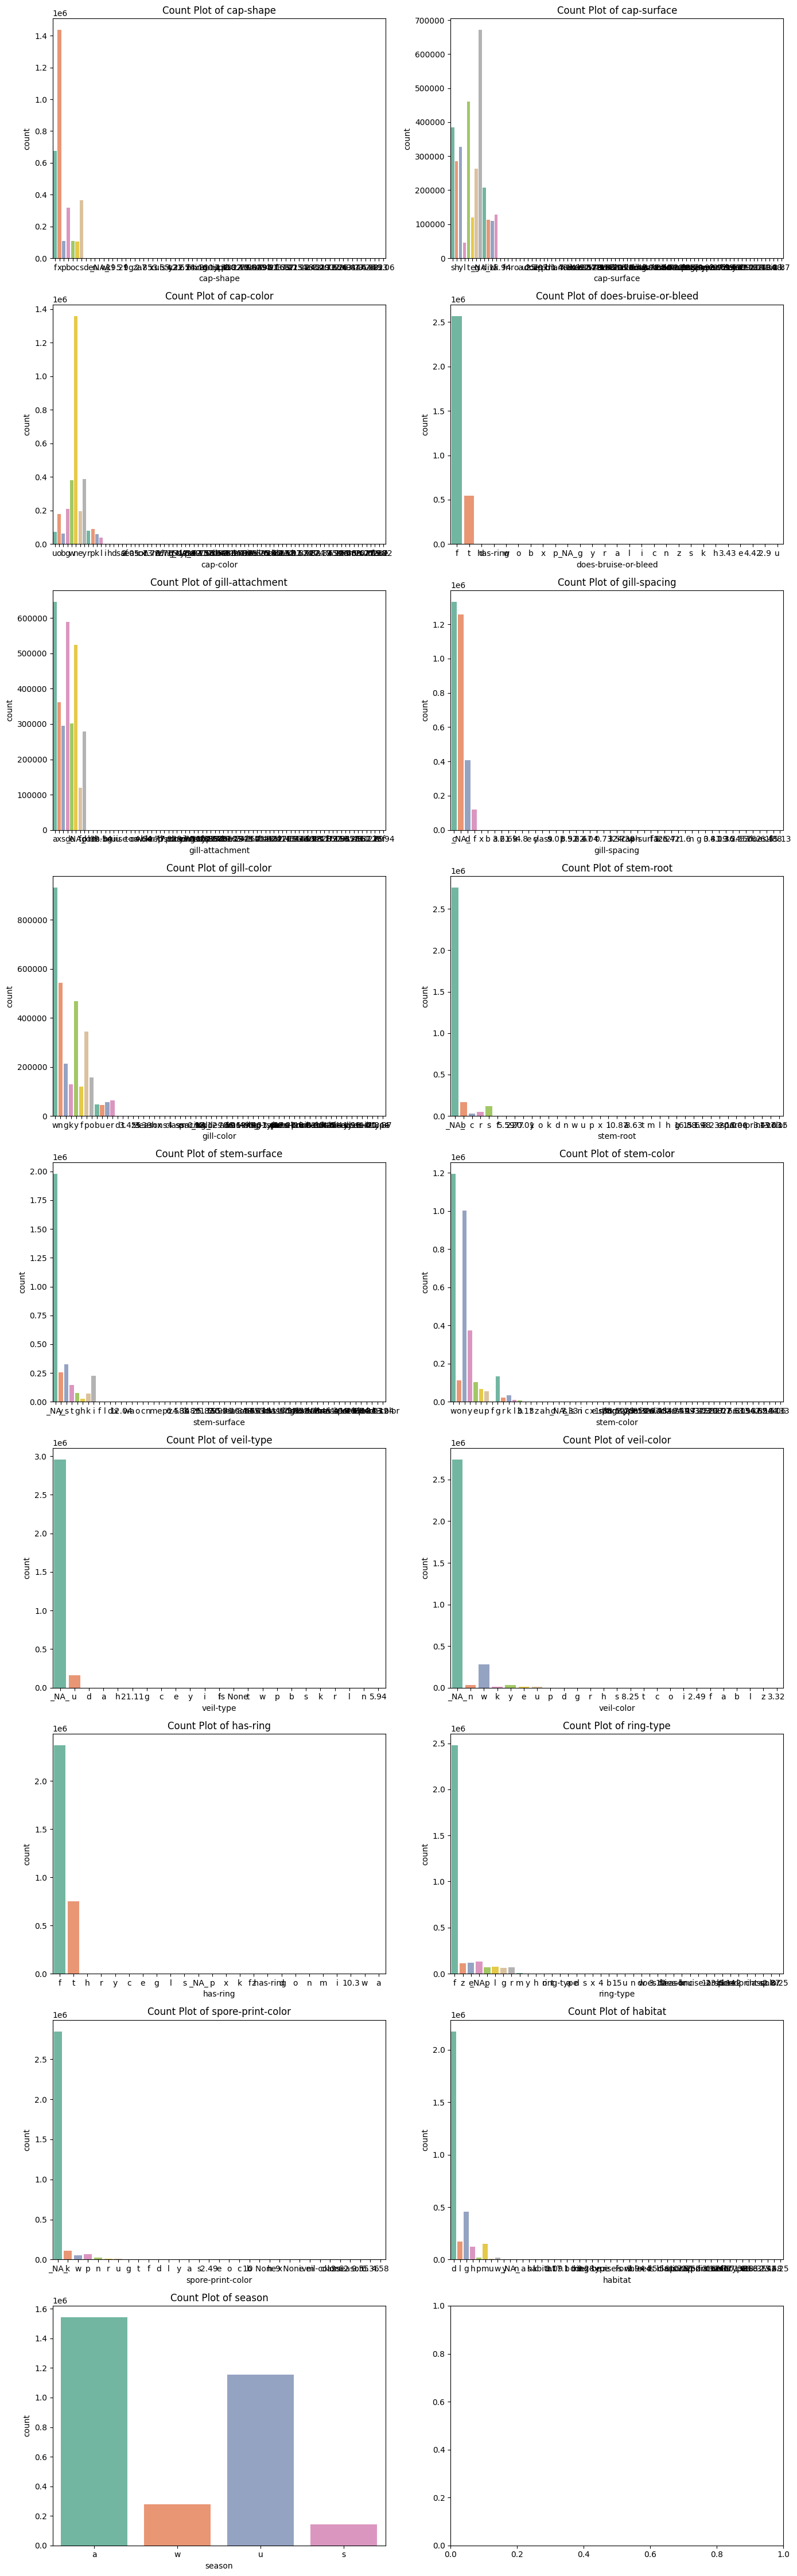

In [8]:
def plot_cats(train):
    n_features = len(cat_cols)
    fig, axes = plt.subplots(n_features // 2 + n_features % 2, 2, figsize=(14, 5 * (n_features // 2 + n_features % 2)))

    for i, feature in enumerate(cat_cols):
        row, col = divmod(i, 2)
        sns.countplot(x=feature, data=train, palette='Set2', ax=axes[row, col])
        axes[row, col].set_title(f'Count Plot of {feature}')

    # Adjust layout
    plt.tight_layout()
    plt.show()
    
plot_cats(train)

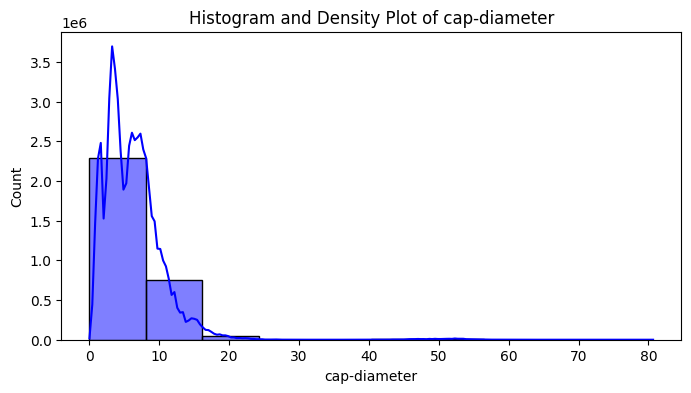

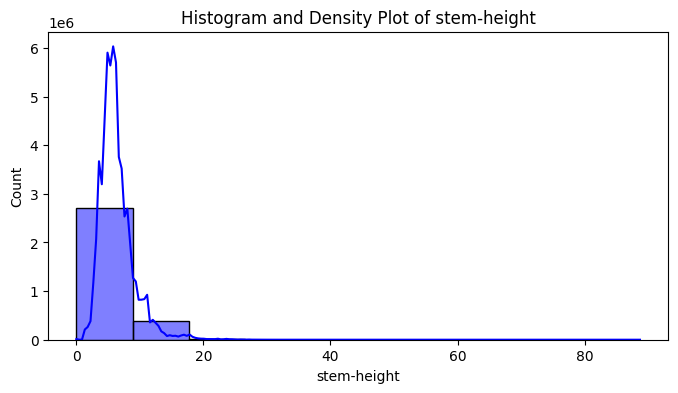

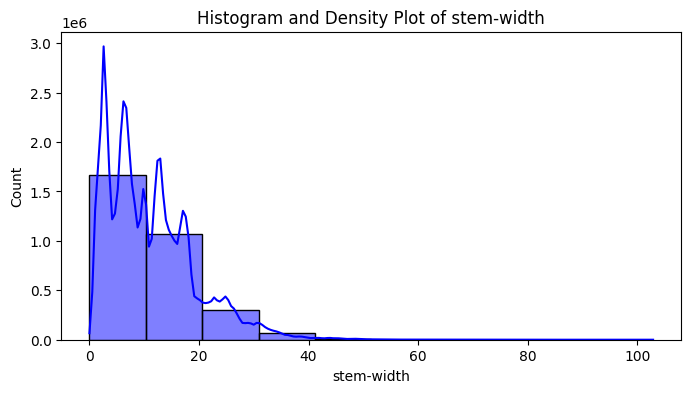

In [9]:
for feature in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(train[feature], kde=True, bins=10, color='blue')
    plt.title(f'Histogram and Density Plot of {feature}')
    plt.show()

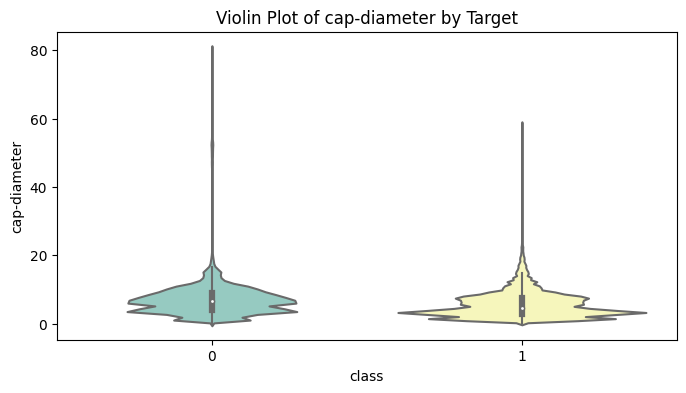

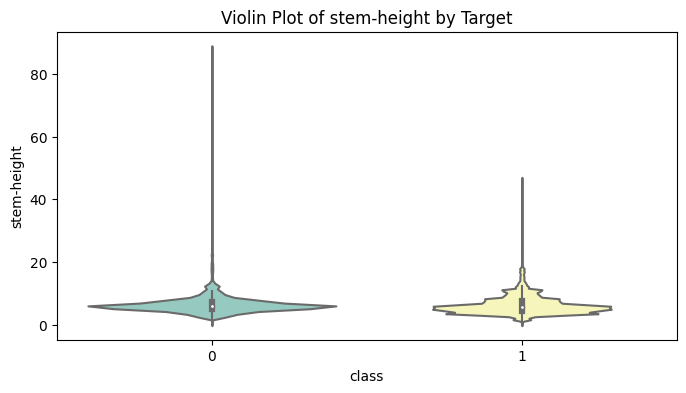

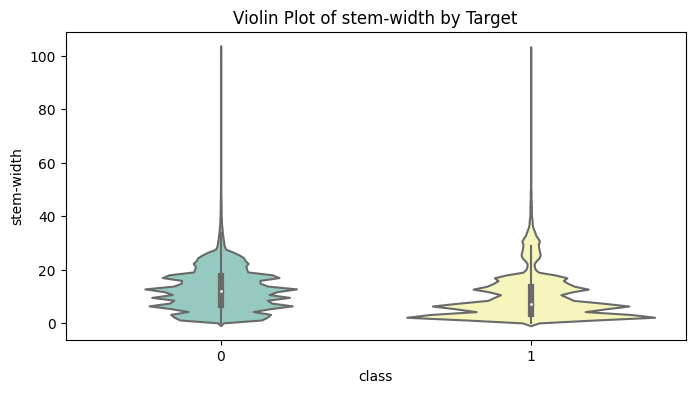

In [10]:
for feature in num_cols:
    plt.figure(figsize=(8, 4))
    sns.violinplot(x='class', y=feature, data=train, palette='Set3')
    plt.title(f'Violin Plot of {feature} by Target')
    plt.show()


# <p style="font-family: 'Amiri'; font-size: 3rem; color: #000000; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #9088fc; padding: 20px; border-radius: 20px; border: 7px solid #000000; width:95%"> 🍄 Statistical Analysis 🍄 </p>

## ❆ Chi-Square Test >> Categorical Statistical Analysis  

- This statistical test checks if there's a significant association between the categorical feature and the binary target. 
- A low p-value (typically < 0.05) suggests a significant relationship.
- All of them are 0s it seems, indicating significant relationship.

## ❆ T-test >> Numerical Statistical Analysis

- Assesses whether the means of the numerical feature differ significantly between the target classes.
- A low p-value (typically < 0.05) suggests a significant relationship.
- p-value shows significant relationship as well for Numerical features.

In [11]:
# CHI-Square Test
def chi2_test(train):
    for feature in cat_cols:
        contingency_table = pd.crosstab(train[feature], train['class'])
        chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
        print(f'Chi-Square Test for {feature}:')
        print(f'Chi2: {chi2}, p-value: {p}')
        print('---' * 15)
        
chi2_test(train)

Chi-Square Test for cap-shape:
Chi2: 87536.59170820877, p-value: 0.0
---------------------------------------------
Chi-Square Test for cap-surface:
Chi2: 199341.8427691567, p-value: 0.0
---------------------------------------------
Chi-Square Test for cap-color:
Chi2: 208414.65245437453, p-value: 0.0
---------------------------------------------
Chi-Square Test for does-bruise-or-bleed:
Chi2: 4433.42530138884, p-value: 0.0
---------------------------------------------
Chi-Square Test for gill-attachment:
Chi2: 169736.913809147, p-value: 0.0
---------------------------------------------
Chi-Square Test for gill-spacing:
Chi2: 41557.482494730895, p-value: 0.0
---------------------------------------------
Chi-Square Test for gill-color:
Chi2: 150920.97126352327, p-value: 0.0
---------------------------------------------
Chi-Square Test for stem-root:
Chi2: 99410.13891772466, p-value: 0.0
---------------------------------------------
Chi-Square Test for stem-surface:
Chi2: 165592.782152838

In [12]:
for feature in num_cols:
    class_0 = train[train['class'] == 1][feature].dropna()
    class_1 = train[train['class'] == 0][feature].dropna()
    t_stat, p_value = stats.ttest_ind(class_0, class_1)
    print(f'T-test for {feature}: t-stat={t_stat:.4f}, p-value={p_value:.4f}')
    print('---' * 20)

T-test for cap-diameter: t-stat=-290.9882, p-value=0.0000
------------------------------------------------------------
T-test for stem-height: t-stat=-87.9249, p-value=0.0000
------------------------------------------------------------
T-test for stem-width: t-stat=-304.2098, p-value=0.0000
------------------------------------------------------------


# <p style="font-family: 'Amiri'; font-size: 3rem; color: #000000; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #9088fc; padding: 20px; border-radius: 20px; border: 7px solid #000000; width:95%"> 🍄 Feature Engineering 🍄 </p>

### ❆ Categorical Data Modelling

- A lot of Noisy data that needs to be assign a new "Other" Category to handle Rare categories.
- Simplifying categories can help reduce noise and improve model performance but also cause Information Loss as well.
- Same results after removing the Noise as well, Statistically it's safe to simplify the categories.
- Considering the size of the data, we can skip one-hot encoding for tree-based models.

### ❆ Numerical Data Modelling

- Need to deal with the skewness in data distribution and outliers.
- Log transformation is often an effective technique to handle skewness and reduce the impact of outliers in numerical features.


### ❆ New Numerical Features
There was still the element of skewness, thus applied log transformation post feature calculation
- Stem Area = Height * Width
- Stem Volume = π * (Width / 2)^2 * Height
- Cap Area = π * (Diameter of Cap / 2)^2
- Stem-to-Cap Ratio = Stem Height / Cap Diameter
- Stem Shape = Width / Height

In [13]:
# Chi-Square test after removing Noise from the categorical features

# Threshold to define rare categories
threshold = 0.05 * len(train)

train_copy = train.copy()

# Combine rare categories
for feature in cat_cols:
    value_counts = train_copy[feature].value_counts()
    rare_categories = value_counts[value_counts < threshold].index
    train_copy[feature] = train_copy[feature].replace(rare_categories, 'Other')
    test[feature] = test[feature].replace(rare_categories, 'Other')
    
chi2_test(train_copy)

Chi-Square Test for cap-shape:
Chi2: 77143.27346611976, p-value: 0.0
---------------------------------------------
Chi-Square Test for cap-surface:
Chi2: 133444.71967846822, p-value: 0.0
---------------------------------------------
Chi-Square Test for cap-color:
Chi2: 117273.56036965369, p-value: 0.0
---------------------------------------------
Chi-Square Test for does-bruise-or-bleed:
Chi2: 4396.1380297730375, p-value: 0.0
---------------------------------------------
Chi-Square Test for gill-attachment:
Chi2: 169649.48993218335, p-value: 0.0
---------------------------------------------
Chi-Square Test for gill-spacing:
Chi2: 41514.242601618564, p-value: 0.0
---------------------------------------------
Chi-Square Test for gill-color:
Chi2: 124095.94278642141, p-value: 0.0
---------------------------------------------
Chi-Square Test for stem-root:
Chi2: 82860.22403729532, p-value: 0.0
---------------------------------------------
Chi-Square Test for stem-surface:
Chi2: 113421.8979

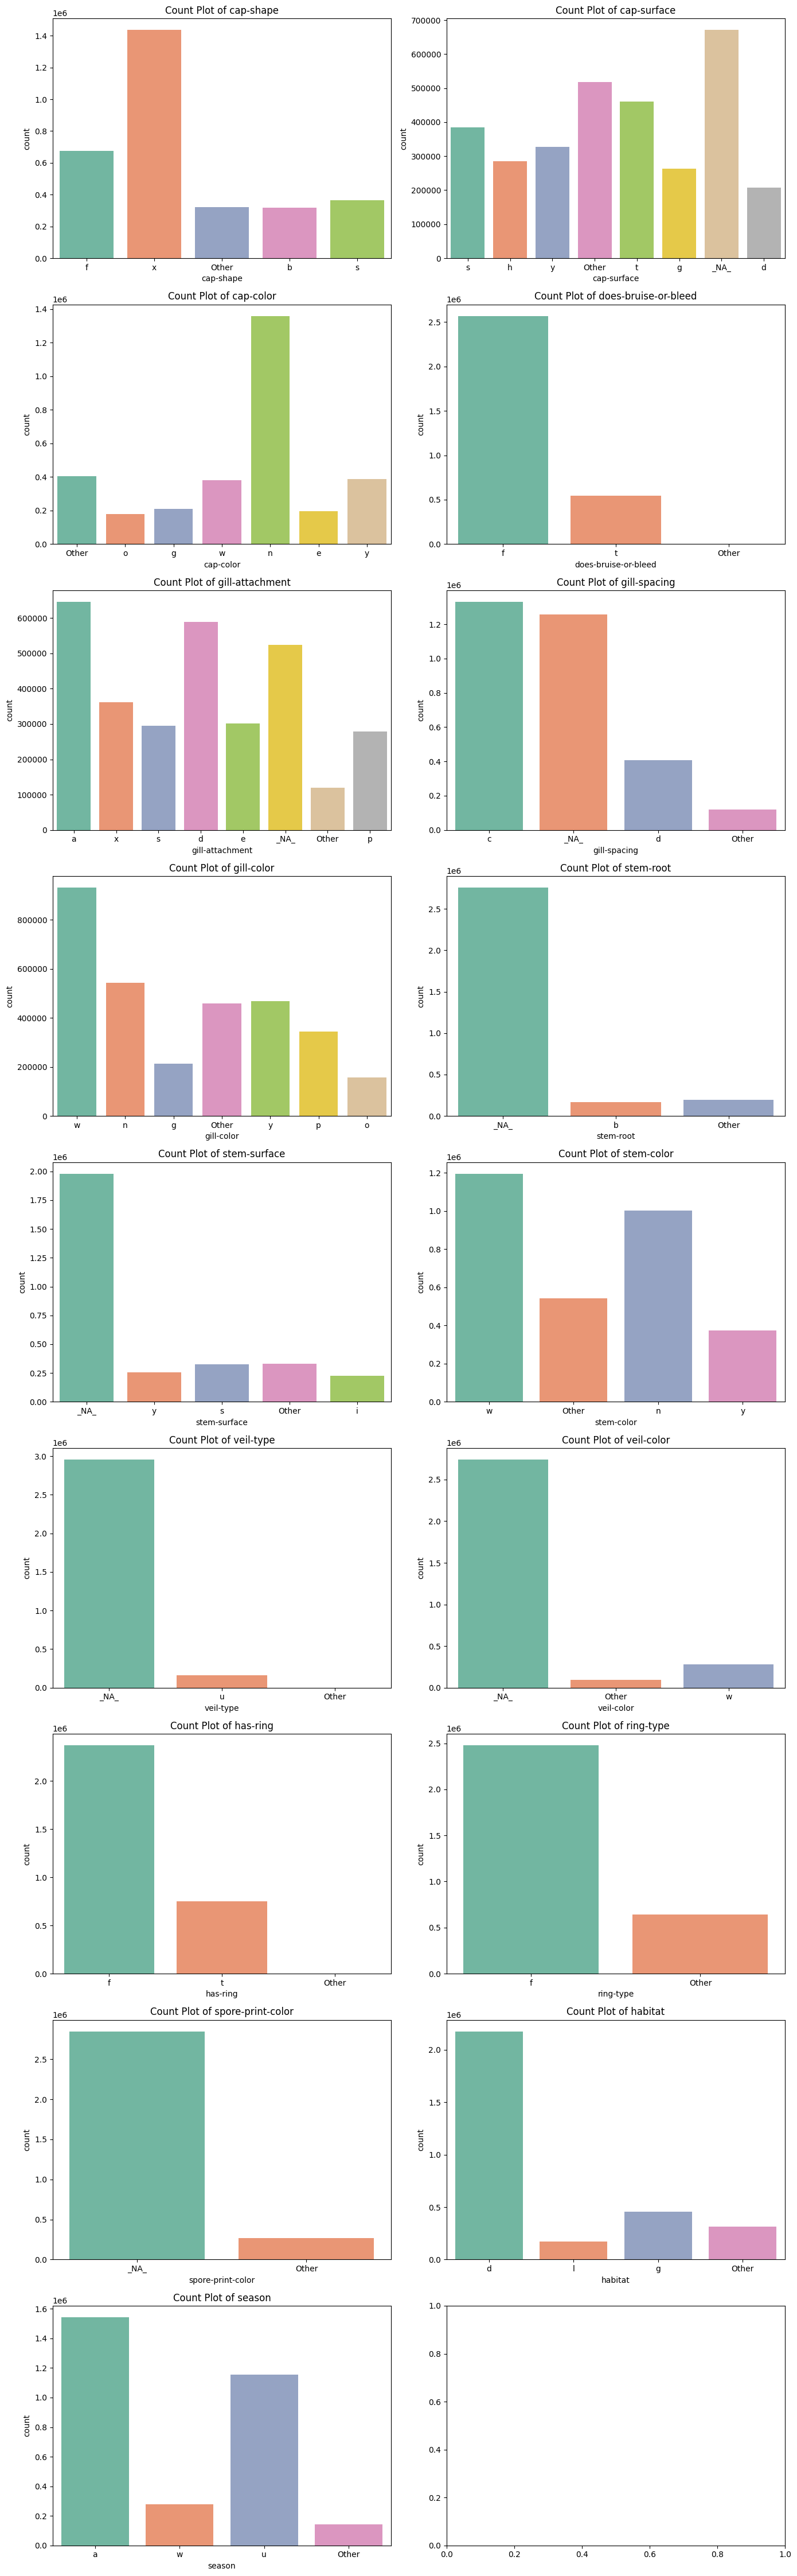

In [14]:
plot_cats(train_copy)

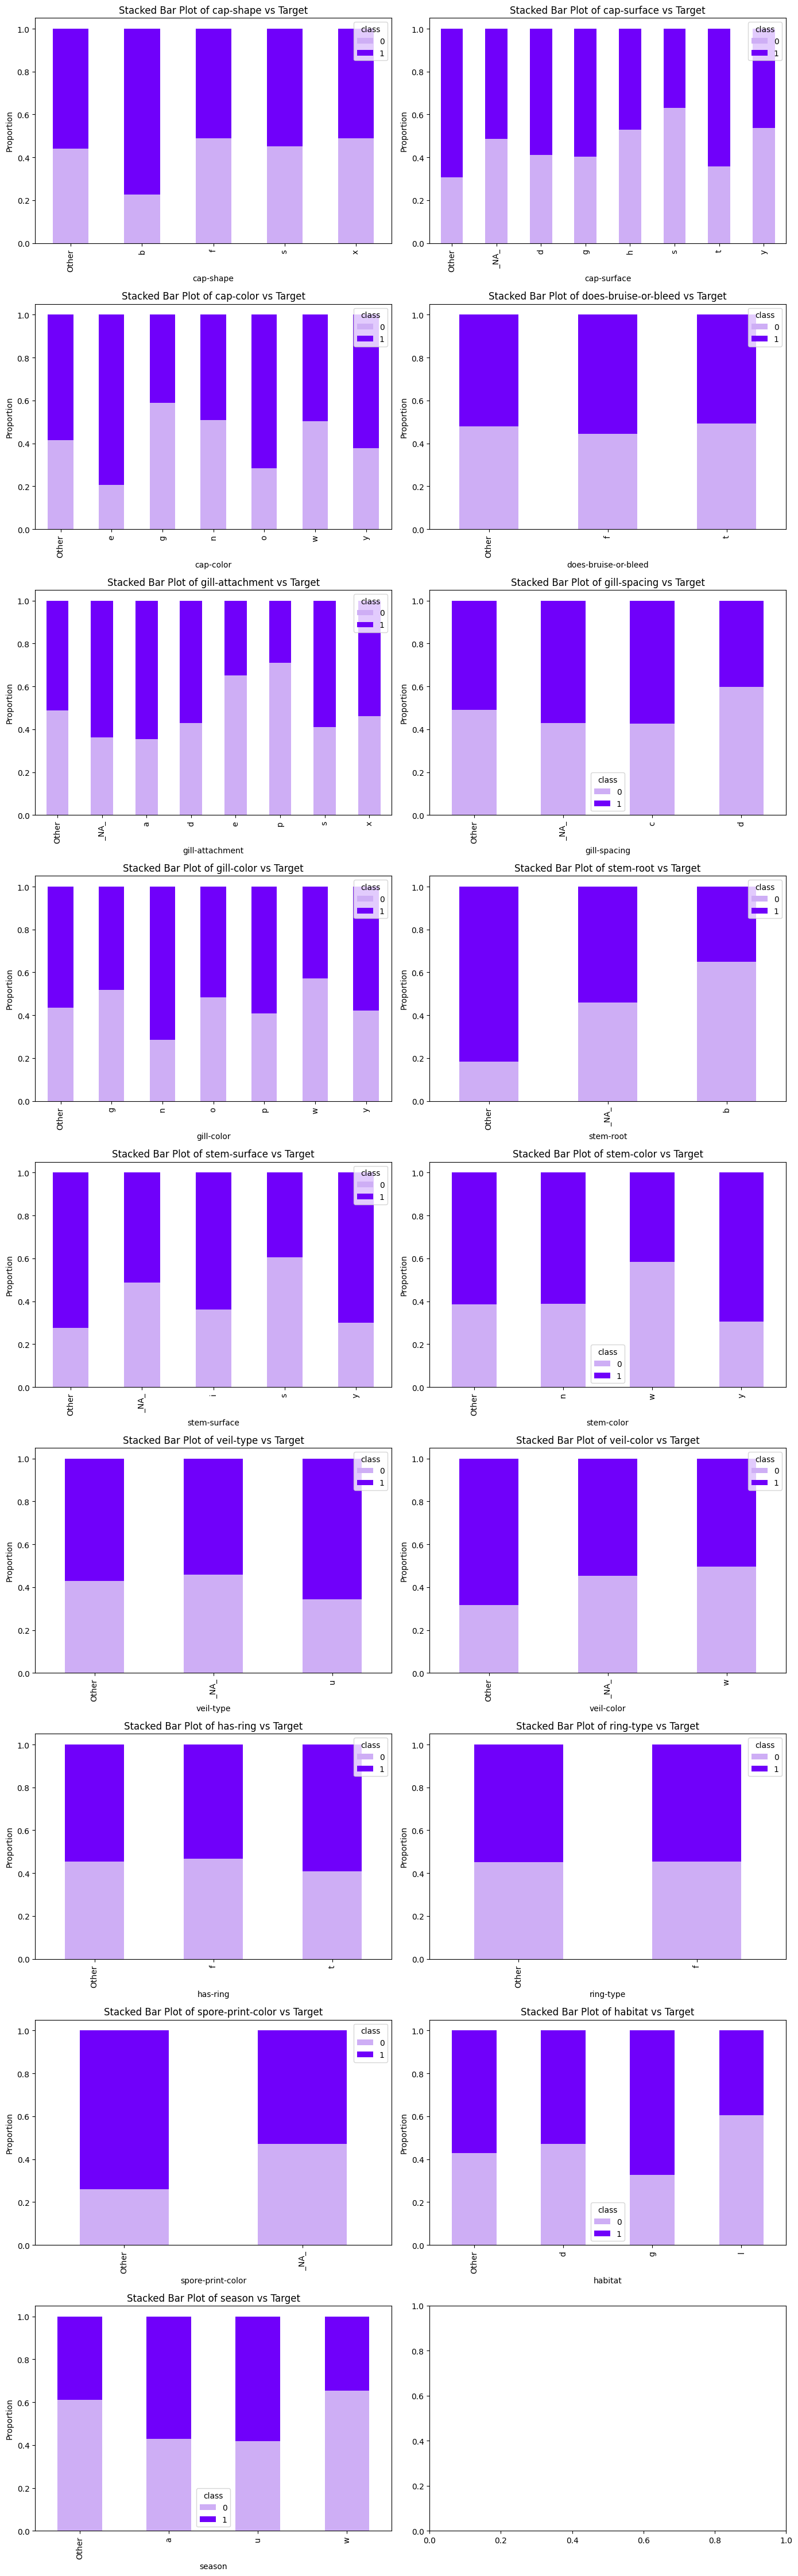

In [15]:
n_features = len(cat_cols)

# Plot two stacked bar plots per row
fig, axes = plt.subplots(n_features // 2 + n_features % 2, 2, figsize=(14, 5 * (n_features // 2 + n_features % 2)))

for i, feature in enumerate(cat_cols):
    row, col = divmod(i, 2)
    
    # Calculate the count of each category for each target value
    cross_tab = pd.crosstab(train_copy[feature], train_copy['class'], normalize='index')
    cross_tab.plot(kind='bar', stacked=True, ax=axes[row, col], color=['#ceaef5', '#7000fa'])
    
    axes[row, col].set_title(f'Stacked Bar Plot of {feature} vs Target')
    axes[row, col].set_ylabel('Proportion')
    axes[row, col].set_xlabel(feature)

# Adjust layout
plt.tight_layout()
plt.show()

In [16]:
train_copy['log-cap-diameter'] = np.log1p(train_copy['cap-diameter'])
train_copy['log-stem-height'] = np.log1p(train_copy['stem-height'])
train_copy['log-stem-width'] = np.log1p(train_copy['stem-width'])

test['log-cap-diameter'] = np.log1p(test['cap-diameter'])
test['log-stem-height'] = np.log1p(test['stem-height'])
test['log-stem-width'] = np.log1p(test['stem-width'])

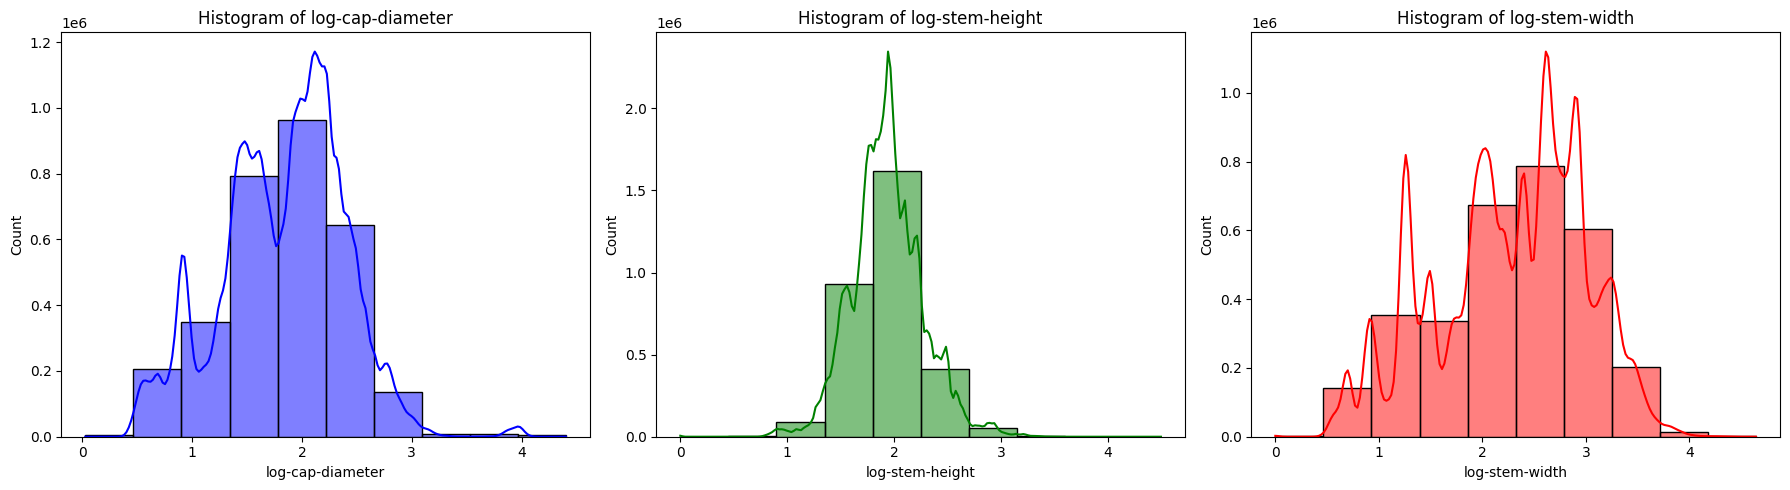

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(train_copy['log-cap-diameter'], kde=True, bins=10, color='blue', ax=axes[0])
axes[0].set_title('Histogram of log-cap-diameter')

sns.histplot(train_copy['log-stem-height'], kde=True, bins=10, color='green', ax=axes[1])
axes[1].set_title('Histogram of log-stem-height')

sns.histplot(train_copy['log-stem-width'], kde=True, bins=10, color='red', ax=axes[2])
axes[2].set_title('Histogram of log-stem-width')

plt.tight_layout()
plt.show()

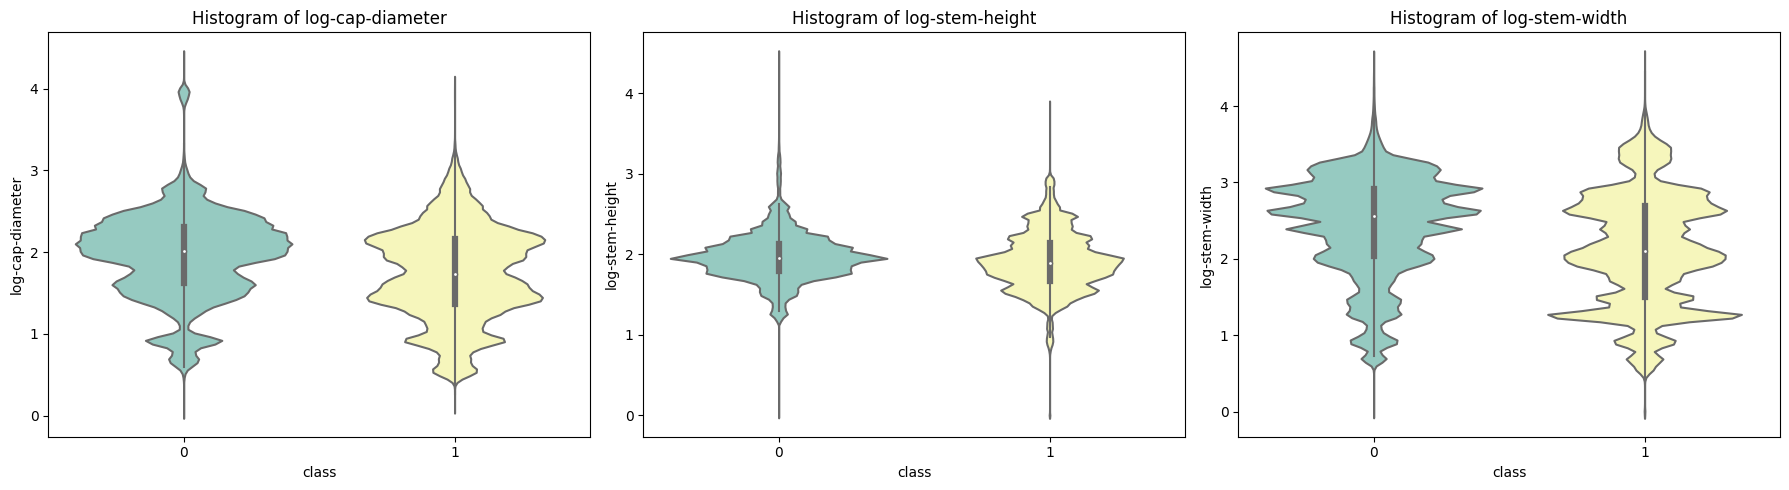

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.violinplot(x='class', y='log-cap-diameter', data=train_copy, palette='Set3', ax=axes[0])
axes[0].set_title('Histogram of log-cap-diameter')

sns.violinplot(x='class', y='log-stem-height', data=train_copy, palette='Set3', ax=axes[1])
axes[1].set_title('Histogram of log-stem-height')

sns.violinplot(x='class', y='log-stem-width', data=train_copy, palette='Set3', ax=axes[2])
axes[2].set_title('Histogram of log-stem-width')

plt.tight_layout()
plt.show()

In [19]:
def create_new_features(train_copy):
    train_copy["Stem_Area"] = np.log1p(train_copy["stem-height"] * train_copy["stem-width"])
    train_copy["Stem_Volume"] = np.log1p(np.pi * (train_copy["stem-width"] / 2)**2 * train_copy["stem-height"])
    train_copy["Cap_Area"] = np.log1p(np.pi * (train_copy['cap-diameter'] / 2)**2)
    train_copy["Stem_Cap_Ratio"] = np.log1p(train_copy["stem-height"] / train_copy['cap-diameter'])
    train_copy["Stem_Shape"] = np.log1p(train_copy["stem-width"] / train_copy["stem-height"])
    
    return train_copy


train_copy = create_new_features(train_copy)
test = create_new_features(test)

In [20]:
# for feature in ["Stem_Area", "Stem_Volume", "Cap_Area", "Stem_Cap_Ratio", "Stem_Shape"]:
#     plt.figure(figsize=(8, 4))
#     sns.histplot(train_copy[feature], kde=True, bins=10, color='blue')
    
#     plt.title(f'Histogram and Density Plot of {feature}')
#     plt.show()
    
# for feature in ["Stem_Area", "Stem_Volume", "Cap_Area", "Stem_Cap_Ratio", "Stem_Shape"]:
#     plt.figure(figsize=(8, 4))
#     sns.violinplot(x='class', y=feature, data=train_copy, palette='Set3')
#     plt.title(f'Violin Plot of {feature} by Target')
#     plt.show()

In [21]:
# Exporting Dataset

train_copy["Stem_Shape"] = train_copy["Stem_Shape"].fillna(0)
test["Stem_Shape"] = test["Stem_Shape"].fillna(0)

train_copy.to_csv("Training-Set.csv", index=False)
test.to_csv("Testing-Set.csv", index=False)

# <p style="font-family: 'Amiri'; font-size: 3rem; color: #000000; text-align: center; margin: 0; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.3); background-color: #9088fc; padding: 20px; border-radius: 20px; border: 7px solid #000000; width:95%"> 🍄 Baseline Model 🍄 </p>

- Simple Catboost with Basic Train Test Split, NO CV.
- Submission CSV 

In [22]:
from sklearn.metrics import matthews_corrcoef
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier

def mcc_metric(y_pred, dmatrix):
    y_true = dmatrix.get_label()
    y_pred = (y_pred > 0.5).astype(int) 
    mcc = matthews_corrcoef(y_true, y_pred)
    return 'mcc', mcc

In [23]:
X = train_copy.drop(columns=["id", "class"])
y = train_copy[["class"]]

cat_cols = list(X.select_dtypes(include=['object']))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [24]:
model = CatBoostClassifier(
    task_type="GPU",
    iterations=10000,
    l2_leaf_reg=1,
    max_depth=7,       
    random_state=7,
    learning_rate=0.005,
    loss_function='CrossEntropy',
    cat_features=cat_cols,
)

model = model.fit(
    X_train, 
    y_train, 
    eval_set = [(X_test, y_test)],
    verbose=25
)


y_pred = model.predict(X_test)
score = matthews_corrcoef(y_test, y_pred)
print('MCC:', score)

0:	learn: 0.6891497	test: 0.6891625	best: 0.6891625 (0)	total: 5s	remaining: 13h 54m
25:	learn: 0.6047859	test: 0.6049594	best: 0.6049594 (25)	total: 13.3s	remaining: 1h 25m 14s
50:	learn: 0.5290224	test: 0.5290173	best: 0.5290173 (50)	total: 21.2s	remaining: 1h 8m 47s
75:	learn: 0.4646852	test: 0.4644665	best: 0.4644665 (75)	total: 29s	remaining: 1h 3m 10s
100:	learn: 0.4133134	test: 0.4128818	best: 0.4128818 (100)	total: 37.3s	remaining: 1h 51s
125:	learn: 0.3690964	test: 0.3685407	best: 0.3685407 (125)	total: 45.2s	remaining: 58m 58s
150:	learn: 0.3346565	test: 0.3340531	best: 0.3340531 (150)	total: 52.5s	remaining: 57m 1s
175:	learn: 0.3021022	test: 0.3015571	best: 0.3015571 (175)	total: 59.7s	remaining: 55m 34s
200:	learn: 0.2765052	test: 0.2759798	best: 0.2759798 (200)	total: 1m 6s	remaining: 54m 18s
225:	learn: 0.2503360	test: 0.2498372	best: 0.2498372 (225)	total: 1m 13s	remaining: 53m 8s
250:	learn: 0.2305463	test: 0.2300485	best: 0.2300485 (250)	total: 1m 20s	remaining: 52m 7

In [25]:
test_pred_prob = model.predict(test.drop(columns=["id"]))

subs['class'] = test_pred_prob
subs["class"] = subs["class"].replace({1:"p", 0:"e"})
    
subs.to_csv('submission.csv', index = False)